In [40]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout



In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [42]:
def plot_input_img(i):
 plt.imshow(X_train[0], cmap= 'binary')
 plt.title(y_train[i])
 plt.axis('off')
 plt.show()


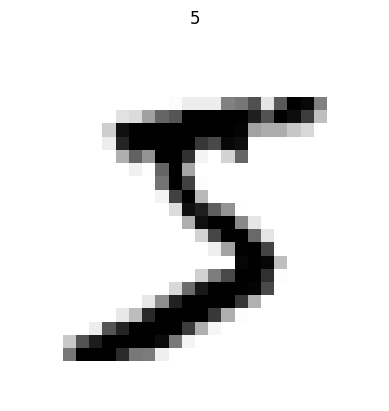

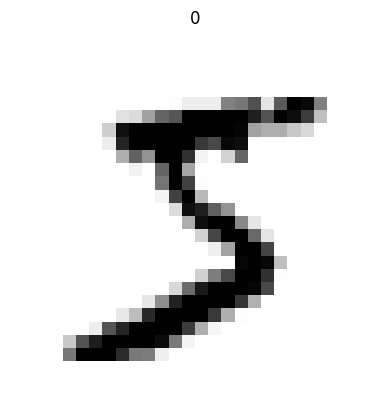

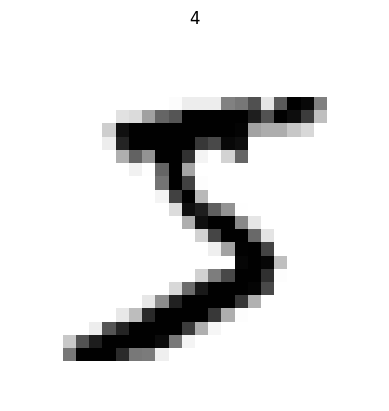

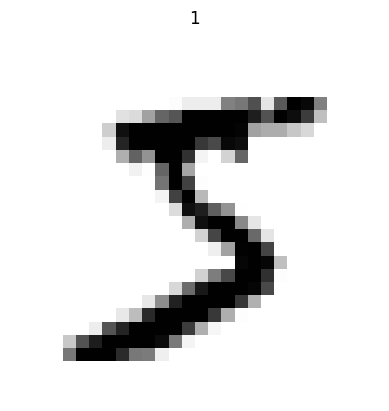

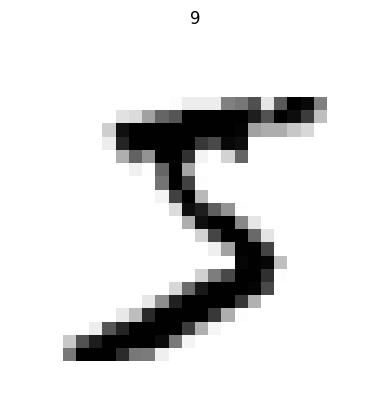

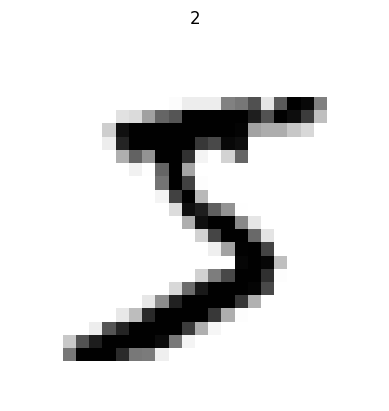

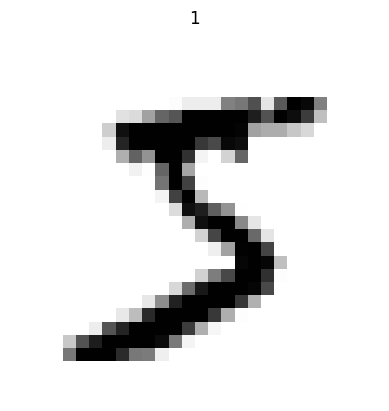

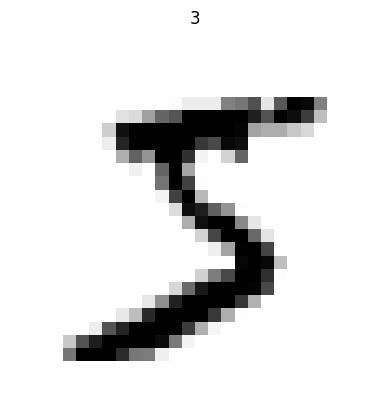

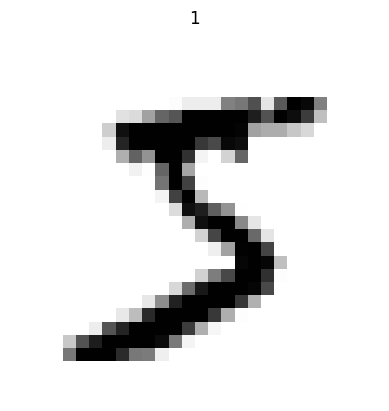

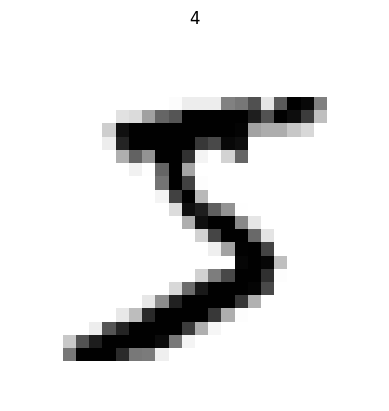

In [43]:
for i in range(10):
    plot_input_img(i)


In [44]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

## reshape/expand the dim of image 
X_train= np.expand_dims(X_train,-1)
X_test= np.expand_dims(X_test,-1)


In [45]:
X_train.shape


(60000, 28, 28, 1)

In [46]:
y_train =keras.utils.to_categorical(y_train)

y_test =keras.utils.to_categorical(y_test)


In [47]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.25),
    Dense(10, activation='softmax')
])


c:\Users\HP\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(
    optimizer=('adam'),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [50]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from keras.callbacks import EarlyStopping , ModelCheckpoint
es=EarlyStopping(monitor='val_acc', min_delta= 0.01, patience= 4, verbose= 1)
mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_acc", verbose =1, save_best_only = True)
cb= [es, mc]


## Model training

In [52]:
his = model.fit(X_train, y_train, epochs=50, validation_split=0.3)


Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8639 - loss: 0.4594 - val_accuracy: 0.9769 - val_loss: 0.0768
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9784 - loss: 0.0733 - val_accuracy: 0.9824 - val_loss: 0.0586
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9849 - val_loss: 0.0480
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9828 - val_loss: 0.0561
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9890 - loss: 0.0335 - val_accuracy: 0.9866 - val_loss: 0.0434
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9874 - val_loss: 0.0428
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9876 - val_loss: 0.0443
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9922 - loss: 0

In [53]:
model_Save = model.save('mnist_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model_S = load_model("C://Users//HP//Downloads//ML//mnist_model.h5")



In [57]:
score = model_S.evaluate(X_test, y_test)

print (f" the model accuracy is {score[1]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0505
 the model accuracy is 0.991599977016449
